## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [285]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import math
import warnings
from sklearn.preprocessing import StandardScaler

In [2]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def dist_visualization(samp1, samp2, lab1, lab2):
    plt.figure(figsize=(15,8))
    sns.distplot(samp1, label=lab1, color='green')
    sns.distplot(samp2, label=lab2, color='red')
    plt.axvline(samp1.mean(),0,1, color='green', label=lab1+" Mean", linestyle='--')
    plt.axvline(samp2.mean(),0,1, color='red', label=lab2+" Mean", linestyle='--')
    plt.title(lab1 + " vs. " + lab2)
    plt.legend()
    warnings.filterwarnings("ignore")
    plt.show()

In [4]:
drug_data = pd.read_csv('drug_consumption_clean.csv')

In [5]:
drug_data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legal_Highs,LSD,Methadone,Mushrooms,Nicotine,Semeron,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [6]:
drug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 31 columns):
Age             1885 non-null float64
Gender          1885 non-null float64
Education       1885 non-null float64
Country         1885 non-null float64
Ethnicity       1885 non-null float64
Nscore          1885 non-null float64
Escore          1885 non-null float64
Oscore          1885 non-null float64
Ascore          1885 non-null float64
Cscore          1885 non-null float64
Impulsive       1885 non-null float64
SS              1885 non-null float64
Alcohol         1885 non-null object
Amphetamines    1885 non-null object
Amyl_Nitrite    1885 non-null object
Benzos          1885 non-null object
Caffeine        1885 non-null object
Cannabis        1885 non-null object
Chocolate       1885 non-null object
Cocaine         1885 non-null object
Crack           1885 non-null object
Ecstasy         1885 non-null object
Heroin          1885 non-null object
Ketamine        1885 non-null 

In [7]:
drug_data = drug_data.round(5)

In [8]:
drug_data['Gender'][0]

0.48246

# Preprocessing Data for Visualization

## First five columns need to be transformed into categorical variables. For purposes of EDA we will give meaning to the values. 

In [9]:
#This function transforms the variables from floats into the appropriate category name when given a list of floats and values
def transform_from_float(column_name, label_list, float_list):
    for i, value in enumerate(float_list):
        drug_data.loc[drug_data[column_name] == value, column_name] = label_list[i]

In [10]:
# Creating float lists and label lists for each categorical column
ages = ["18_24", "25_34", "35_44", "45_54", "55_64", "65_"]
age_idents = [-0.95197, -0.07854, 0.49788, 1.09449, 1.82213, 2.59171]

genders = ['Male', 'Female']
gen_idents = [-.48246, .48246]

educations = ["Under16", "At16", "At17", "At18", "SomeCollege","ProfessionalCert", "Bachelors", "Masters", "Doctorate"]
education_idents = [-2.43591, -1.73790, -1.43719, -1.22751, -0.61113, -0.05921, 0.45468, 1.16365, 1.98437]

countries = ['Australia', 'Canada', 'New Zealand', 'Other', 'Ireland', 'UK', 'USA']
country_idents = [-0.09765, 0.24923, -0.46841, -0.28519, 0.21128, 0.96082, -0.57009]

ethnicities = ["Asian", "Black",  "Black/Asian", "White/Asian", "White/Black", "Other", "White"]
ethnicity_idents = [-0.50212, -1.10702, 1.90725, 0.12600, -0.22166, 0.11440, -0.31685]



In [11]:
#Applying our function to each of our categorical columns
transform_from_float('Gender', genders, gen_idents)
transform_from_float('Age', ages, age_idents)
transform_from_float('Education', educations, education_idents)
transform_from_float('Country', countries, country_idents)
transform_from_float('Ethnicity', ethnicities, ethnicity_idents)

In [12]:
# Checking the top of the df to make sure everything worked
drug_data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legal_Highs,LSD,Methadone,Mushrooms,Nicotine,Semeron,VSA
0,35_44,Female,ProfessionalCert,UK,White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,25_34,Male,Doctorate,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,35_44,Male,ProfessionalCert,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,18_24,Female,Masters,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,35_44,Female,Doctorate,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [13]:
# Reclassifying CLs to be User or non-user
user_labels = ['User_Alcohol','User_Amphet', 'User_Amyl', 'User_Benzos', 'User_Caff', 'User_Cannabis', 'User_Choc', 
               'User_Coke', 'User_Crack', 'User_Ecstasy', 'User_Heroin', 'User_Ketamine', 'User_Legalh', 'User_LSD', 
               'User_Meth', 'User_Mushrooms','User_Nicotine', 'User_Semer', 'User_VSA']
columns = list(drug_data.columns[12:].values)

In [14]:
for column in columns:
    le = LabelEncoder()
    drug_data[column] = le.fit_transform(drug_data[column])

In [15]:
drug_data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legal_Highs,LSD,Methadone,Mushrooms,Nicotine,Semeron,VSA
0,35_44,Female,ProfessionalCert,UK,White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,2,0,0
1,25_34,Male,Doctorate,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,4,0,2,0,2,3,0,4,0,0
2,35_44,Male,ProfessionalCert,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,1,0,0,0
3,18_24,Female,Masters,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,2,0,0,0,0,2,0,0
4,35_44,Female,Doctorate,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,1,0,0,1,0,0,2,2,0,0


In [16]:
for i in range(len(columns)):
    drug_data.loc[((drug_data[columns[i]] == 0) | (drug_data[columns[i]] == 1)), user_labels[i]] = 'Non-user'
    drug_data.loc[((drug_data[columns[i]] == 2) | (drug_data[columns[i]] == 3) | (drug_data[columns[i]] == 4)
                  | (drug_data[columns[i]] == 5) | (drug_data[columns[i]] == 6)), user_labels[i]] = 'User'

In [17]:
drug_data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,User_Ecstasy,User_Heroin,User_Ketamine,User_Legalh,User_LSD,User_Meth,User_Mushrooms,User_Nicotine,User_Semer,User_VSA
0,35_44,Female,ProfessionalCert,UK,White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,User,Non-user,Non-user
1,25_34,Male,Doctorate,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,User,Non-user,User,Non-user,User,User,Non-user,User,Non-user,Non-user
2,35_44,Male,ProfessionalCert,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user
3,18_24,Female,Masters,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,Non-user,Non-user,User,Non-user,Non-user,Non-user,Non-user,User,Non-user,Non-user
4,35_44,Female,Doctorate,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,User,User,Non-user,Non-user


In [18]:
drug_data['User_Cannabis'].value_counts()

User        1265
Non-user     620
Name: User_Cannabis, dtype: int64

In [19]:
#Visualizing MJ users vs. non MJ users

mj_user_df = drug_data.loc[drug_data['User_Cannabis'] == 'User']
non_mj_user_df = drug_data.loc[drug_data['User_Cannabis'] == 'Non-user']
non_mj_user_df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,User_Ecstasy,User_Heroin,User_Ketamine,User_Legalh,User_LSD,User_Meth,User_Mushrooms,User_Nicotine,User_Semer,User_VSA
0,35_44,Female,ProfessionalCert,UK,White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,User,Non-user,Non-user
5,65_,Female,At18,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,User,Non-user,Non-user
6,45_54,Male,Masters,USA,White,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,...,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,User,Non-user,Non-user
7,35_44,Male,At16,UK,White,-1.32828,1.93886,-0.84732,-0.30172,1.63088,...,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user
8,35_44,Female,ProfessionalCert,Canada,White,0.62967,2.57309,-0.97631,0.76096,1.13407,...,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,User,Non-user,Non-user


In [209]:
# One hot encoding those
for column in drug_data.columns[-19:]:
    le = LabelEncoder()
    drug_data[column] = le.fit_transform(drug_data[column])

In [212]:
# Creating illegal total use column
drug_data['Illegal_Total_Use'] = drug_data['User_Amphet'] + drug_data['User_Amyl'] + drug_data['User_Benzos'] + drug_data['User_Coke'] + drug_data['User_Crack'] + drug_data['User_Ecstasy'] + drug_data['User_Heroin'] + drug_data['User_Ketamine'] +drug_data['User_LSD'] + drug_data['User_Meth'] + drug_data['User_Mushrooms'] + drug_data['User_VSA']
drug_data['Illegal_Total_Use'].value_counts()


0     638
1     238
5     136
3     136
2     134
4     129
6     106
7     100
8      95
9      78
10     56
11     29
12     10
Name: Illegal_Total_Use, dtype: int64

In [213]:
drug_data.loc[(drug_data['Illegal_Total_Use'] == 0), 'User_Illegal_Drugs'] = 'Non-user'
drug_data.loc[(drug_data['Illegal_Total_Use'] != 0), 'User_Illegal_Drugs'] = 'User'
drug_data['User_Illegal_Drugs'].value_counts()

User        1247
Non-user     638
Name: User_Illegal_Drugs, dtype: int64

In [214]:
drug_data['User_Illegal_Drugs'] = le.fit_transform(drug_data['User_Illegal_Drugs'])
drug_data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,User_Ketamine,User_Legalh,User_LSD,User_Meth,User_Mushrooms,User_Nicotine,User_Semer,User_VSA,Illegal_Total_Use,User_Illegal_Drugs
0,35_44,Female,ProfessionalCert,UK,White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,1,0,0,2,1
1,25_34,Male,Doctorate,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,1,0,1,1,0,1,0,0,7,1
2,35_44,Male,ProfessionalCert,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,0,0,0,0
3,18_24,Female,Masters,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,1,0,0,0,0,1,0,0,3,1
4,35_44,Female,Doctorate,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,0,0,0,1,1,0,0,1,1


# Visualizing Education

In [20]:
mj_user_df['Education'].value_counts()

SomeCollege         453
Bachelors           292
ProfessionalCert    155
Masters             142
At18                 77
At16                 55
Doctorate            48
At17                 23
Under16              20
Name: Education, dtype: int64

In [152]:
mj_user_edu_counts = mj_user_df['Education'].value_counts()
non_mj_user_edu_counts = non_mj_user_df['Education'].value_counts()


In [172]:
print(mj_user_edu_counts)
print("")
print(non_mj_user_edu_counts)

SomeCollege         453
Bachelors           292
ProfessionalCert    155
Masters             142
At18                 77
At16                 55
Doctorate            48
At17                 23
Under16              20
Name: Education, dtype: int64

Bachelors           188
Masters             141
ProfessionalCert    115
SomeCollege          53
At16                 44
Doctorate            41
At18                 23
Under16               8
At17                  7
Name: Education, dtype: int64


In [153]:
mj_user_edu_counts_df = pd.DataFrame({'Education Level': list(mj_user_edu_counts.index),
                                    'Count of Users': list(mj_user_edu_counts.values)})

In [154]:
non_mj_user_edu_counts_df = pd.DataFrame({'Education Level': list(non_mj_user_edu_counts.index),
                                    'Count of Non-Users': list(non_mj_user_edu_counts.values)})

In [155]:
#Re-ordering the dataframe so it appears in correct order on the visualization

#First creating a mapping to put education levels in order
education_order = ['Under16', 'At16', 'At17', 'At18', 'SomeCollege', 'ProfessionalCert', 'Bachelors', 'Masters', 'Doctorate']
mapping = {level: i for i, level in enumerate(education_order)}

#Creating a new column using the mapping
mj_user_edu_counts_df['Level Order'] = mj_user_edu_counts_df['Education Level'].map(mapping)
non_mj_user_edu_counts_df['Level Order'] = non_mj_user_edu_counts_df['Education Level'].map(mapping)

In [163]:
#Sorting by the newly created order
mj_user_edu_counts_df = mj_user_edu_counts_df.sort_values(by=['Level Order'], ascending=True)
non_mj_user_edu_counts_df = non_mj_user_edu_counts_df.sort_values(by=['Level Order'], ascending=True)

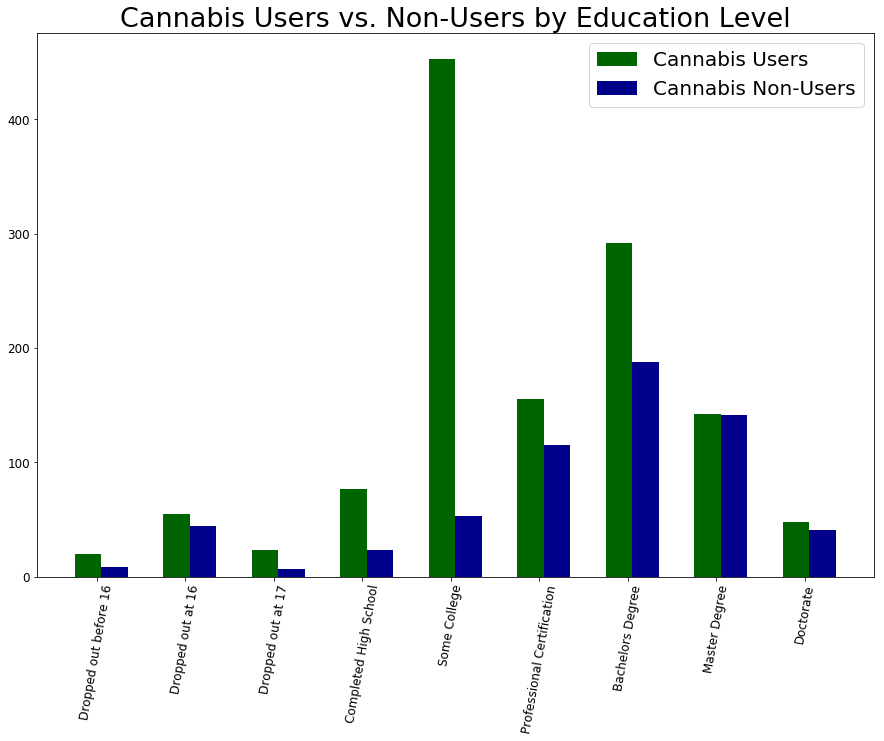

In [198]:
# Putting it on a plot!
y_pos = np.arange(len(mj_user_edu_counts))
y_pos

plt.figure(figsize=(15,10))
plt.bar(y_pos+0, mj_user_edu_counts_df['Count of Users'], width=0.3, label='Cannabis Users' ,color='darkgreen')
plt.bar(y_pos+0.3, non_mj_user_edu_counts_df['Count of Non-Users'], width=0.3, label='Cannabis Non-Users', color='darkblue')

xtick_names = ['Dropped out before 16', 'Dropped out at 16', 'Dropped out at 17', 'Completed High School', 'Some College', 
              'Professional Certification', 'Bachelors Degree', 'Master Degree', 'Doctorate']
plt.xticks(y_pos+0.1, xtick_names, rotation=80, fontsize=15)
plt.legend(fontsize=20)
plt.title('Cannabis Users vs. Non-Users by Education Level', fontsize=27)
plt.tick_params(axis='both', which='major', labelsize=12)

In [35]:
list(mj_user_edu_counts.index)

['SomeCollege',
 'Bachelors',
 'ProfessionalCert',
 'Masters',
 'At18',
 'At16',
 'Doctorate',
 'At17',
 'Under16']

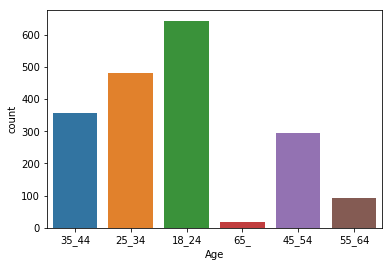

In [36]:
sns.countplot(x='Age', data=drug_data)

In [322]:
mj_percent_tried = mj_user_edu_counts / (non_mj_user_edu_counts + mj_user_edu_counts)
mj_percent_tried

mj_percent_tried_df = pd.DataFrame({'Education Level': list(mj_percent_tried.index),
                                    'Percent Use': list(mj_percent_tried.values)})

mj_percent_tried_df['Level Order'] = mj_percent_tried_df['Education Level'].map(mapping)

mj_percent_tried_df = mj_percent_tried_df.sort_values(by=['Level Order'], ascending=True)

mj_percent_tried_df

,Education Level,Percent Use,Level Order
8,Under16,0.714286,0
0,At16,0.555556,1
1,At17,0.766667,2
2,At18,0.770000,3
7,SomeCollege,0.895257,4
6,ProfessionalCert,0.574074,5
3,Bachelors,0.608333,6
5,Masters,0.501767,7
4,Doctorate,0.539326,8


In [323]:
illegal_user_edu_counts = drug_data.loc[drug_data['User_Illegal_Drugs'] == 1]['Education'].value_counts()
non_illegal_user_edu_counts = drug_data.loc[drug_data['User_Illegal_Drugs'] == 0]['Education'].value_counts()

In [324]:
illegal_percent_tried = illegal_user_edu_counts / (non_illegal_user_edu_counts + illegal_user_edu_counts)
illegal_percent_tried

illegal_percent_tried_df = pd.DataFrame({'Education Level': list(illegal_percent_tried.index),
                                    'Percent Use': list(illegal_percent_tried.values)})

illegal_percent_tried_df['Level Order'] = illegal_percent_tried_df['Education Level'].map(mapping)

illegal_percent_tried_df = illegal_percent_tried_df.sort_values(by=['Level Order'], ascending=True)

illegal_percent_tried_df

,Education Level,Percent Use,Level Order
8,Under16,0.678571,0
0,At16,0.606061,1
1,At17,0.733333,2
2,At18,0.790000,3
7,SomeCollege,0.885375,4
6,ProfessionalCert,0.574074,5
3,Bachelors,0.595833,6
5,Masters,0.448763,7
4,Doctorate,0.573034,8


In [325]:
nicotine_user_edu_counts = drug_data.loc[drug_data['User_Nicotine'] == 1]['Education'].value_counts()
non_nicotine_user_edu_counts = drug_data.loc[drug_data['User_Nicotine'] == 0]['Education'].value_counts()

In [326]:
nicotine_percent_tried = nicotine_user_edu_counts / (non_nicotine_user_edu_counts + nicotine_user_edu_counts)
nicotine_percent_tried

nicotine_percent_tried_df = pd.DataFrame({'Education Level': list(nicotine_percent_tried.index),
                                    'Percent Use': list(nicotine_percent_tried.values)})

nicotine_percent_tried_df['Level Order'] = nicotine_percent_tried_df['Education Level'].map(mapping)

nicotine_percent_tried_df = nicotine_percent_tried_df.sort_values(by=['Level Order'], ascending=True)

nicotine_percent_tried_df

,Education Level,Percent Use,Level Order
8,Under16,0.785714,0
0,At16,0.636364,1
1,At17,0.766667,2
2,At18,0.810000,3
7,SomeCollege,0.830040,4
6,ProfessionalCert,0.622222,5
3,Bachelors,0.595833,6
5,Masters,0.554770,7
4,Doctorate,0.494382,8


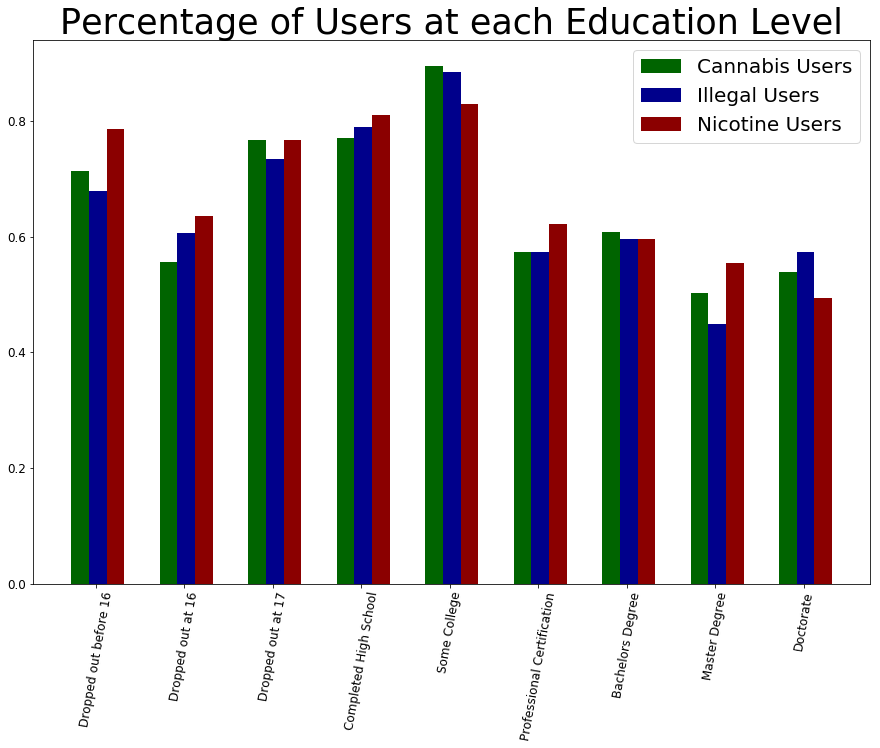

In [328]:
# Putting it on a plot!
y_pos = np.arange(len(mj_user_edu_counts))
y_pos

plt.figure(figsize=(15,10))
plt.bar(y_pos+0, mj_percent_tried_df['Percent Use'], width=0.2, label='Cannabis Users' ,color='darkgreen')
plt.bar(y_pos+0.2, illegal_percent_tried_df['Percent Use'], width=0.2, label='Illegal Users', color='darkblue')
plt.bar(y_pos+0.4, nicotine_percent_tried_df['Percent Use'], width=0.2, label='Nicotine Users', color='darkred')

xtick_names = ['Dropped out before 16', 'Dropped out at 16', 'Dropped out at 17', 'Completed High School', 'Some College', 
              'Professional Certification', 'Bachelors Degree', 'Master Degree', 'Doctorate']
plt.xticks(y_pos+0.18, xtick_names, rotation=80, fontsize=25)
plt.legend(fontsize=20)
plt.title('Percentage of Users at each Education Level', fontsize=35)
plt.tick_params(axis='both', which='major', labelsize=12)

# Visualizing Age

In [330]:
#Pulling in value counts for users and non-users ages
cannabis_user_age_counts = drug_data.loc[drug_data['User_Cannabis'] == 1]['Age'].value_counts()
non_cannabis_user_age_counts = drug_data.loc[drug_data['User_Cannabis'] == 0]['Age'].value_counts()

#Creating a 'percent tried' metric
cannabis_percent_tried = cannabis_user_age_counts / (non_cannabis_user_age_counts + cannabis_user_age_counts)

#Put it in a dataframe
cannabis_percent_tried_df = pd.DataFrame({'Age': list(cannabis_percent_tried.index),
                                    'Percent Use': list(cannabis_percent_tried.values)})


In [331]:
#Pulling in value counts for users and non-users ages
illegal_user_age_counts = drug_data.loc[drug_data['User_Illegal_Drugs'] == 1]['Age'].value_counts()
non_illegal_user_age_counts = drug_data.loc[drug_data['User_Illegal_Drugs'] == 0]['Age'].value_counts()

#Creating a 'percent tried' metric
illegal_percent_tried = illegal_user_age_counts / (non_illegal_user_age_counts + illegal_user_age_counts)

#Put it in a dataframe
illegal_percent_tried_df = pd.DataFrame({'Age': list(illegal_percent_tried.index),
                                    'Percent Use': list(illegal_percent_tried.values)})


In [332]:
#Pulling in value counts for users and non-users ages
nicotine_user_age_counts = drug_data.loc[drug_data['User_Nicotine'] == 1]['Age'].value_counts()
non_nicotine_user_age_counts = drug_data.loc[drug_data['User_Nicotine'] == 0]['Age'].value_counts()

#Creating a 'percent tried' metric
nicotine_percent_tried = nicotine_user_age_counts / (non_nicotine_user_age_counts + nicotine_user_age_counts)

#Put it in a dataframe
nicotine_percent_tried_df = pd.DataFrame({'Age': list(nicotine_percent_tried.index),
                                    'Percent Use': list(nicotine_percent_tried.values)})


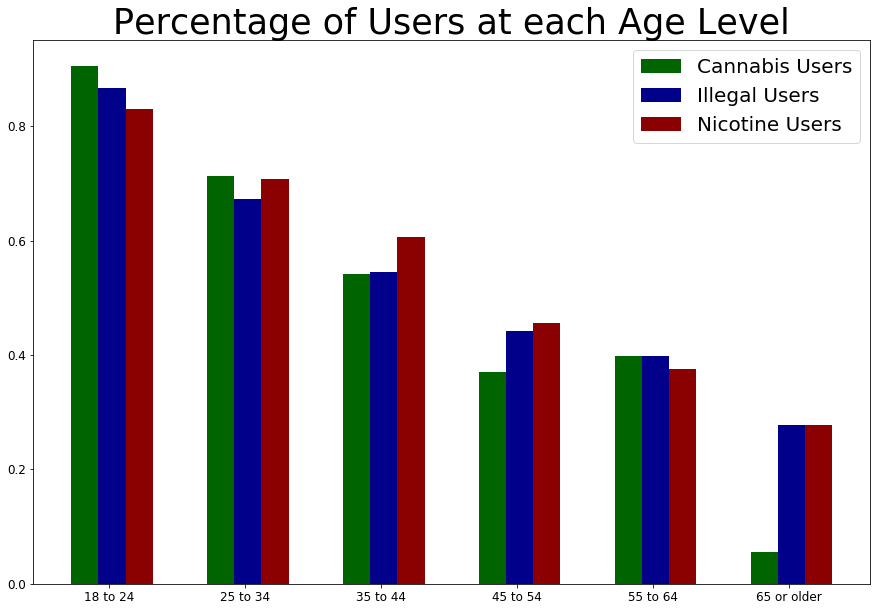

In [334]:
# Putting it on a plot!
y_pos = np.arange(len(illegal_user_age_counts))
y_pos

plt.figure(figsize=(15,10))
plt.bar(y_pos+0, cannabis_percent_tried_df['Percent Use'], width=0.2, label='Cannabis Users' ,color='darkgreen')
plt.bar(y_pos+0.2, illegal_percent_tried_df['Percent Use'], width=0.2, label='Illegal Users', color='darkblue')
plt.bar(y_pos+0.4, nicotine_percent_tried_df['Percent Use'], width=0.2, label='Nicotine Users', color='darkred')

xtick_names = ['18 to 24', '25 to 34', '35 to 44', '45 to 54', '55 to 64', '65 or older']
plt.xticks(y_pos+0.18, xtick_names, fontsize=25)
plt.legend(fontsize=20)
plt.title('Percentage of Users at each Age Level', fontsize=35)
plt.tick_params(axis='both', which='major', labelsize=12)

# Visualizing Gender

In [335]:
#Pulling in value counts for users and non-users genders
cannabis_user_gender_counts = drug_data.loc[drug_data['User_Cannabis'] == 1]['Gender'].value_counts()
non_cannabis_user_gender_counts = drug_data.loc[drug_data['User_Cannabis'] == 0]['Gender'].value_counts()

#Creating a 'percent tried' metric
cannabis_percent_tried = cannabis_user_gender_counts / (non_cannabis_user_gender_counts + cannabis_user_gender_counts)

#Put it in a dataframe
cannabis_percent_tried_df = pd.DataFrame({'Gender': list(cannabis_percent_tried.index),
                                    'Percent Use': list(cannabis_percent_tried.values)})

cannabis_percent_tried_df

,Gender,Percent Use
0,Female,0.559448
1,Male,0.782609


In [336]:
#Pulling in value counts for users and non-users genders
illegal_user_gender_counts = drug_data.loc[drug_data['User_Illegal_Drugs'] == 1]['Gender'].value_counts()
non_illegal_user_gender_counts = drug_data.loc[drug_data['User_Illegal_Drugs'] == 0]['Gender'].value_counts()

#Creating a 'percent tried' metric
illegal_percent_tried = illegal_user_gender_counts / (non_illegal_user_gender_counts + illegal_user_gender_counts)

#Put it in a dataframe
illegal_percent_tried_df = pd.DataFrame({'Gender': list(illegal_percent_tried.index),
                                    'Percent Use': list(illegal_percent_tried.values)})
illegal_percent_tried_df

,Gender,Percent Use
0,Female,0.548832
1,Male,0.774125


In [337]:
#Pulling in value counts for users and non-users genders
nicotine_user_gender_counts = drug_data.loc[drug_data['User_Nicotine'] == 1]['Gender'].value_counts()
non_nicotine_user_gender_counts = drug_data.loc[drug_data['User_Nicotine'] == 0]['Gender'].value_counts()

#Creating a 'percent tried' metric
nicotine_percent_tried = nicotine_user_gender_counts / (non_nicotine_user_gender_counts + nicotine_user_gender_counts)

#Put it in a dataframe
nicotine_percent_tried_df = pd.DataFrame({'Gender': list(nicotine_percent_tried.index),
                                    'Percent Use': list(nicotine_percent_tried.values)})
nicotine_percent_tried_df

,Gender,Percent Use
0,Female,0.595541
1,Male,0.745493


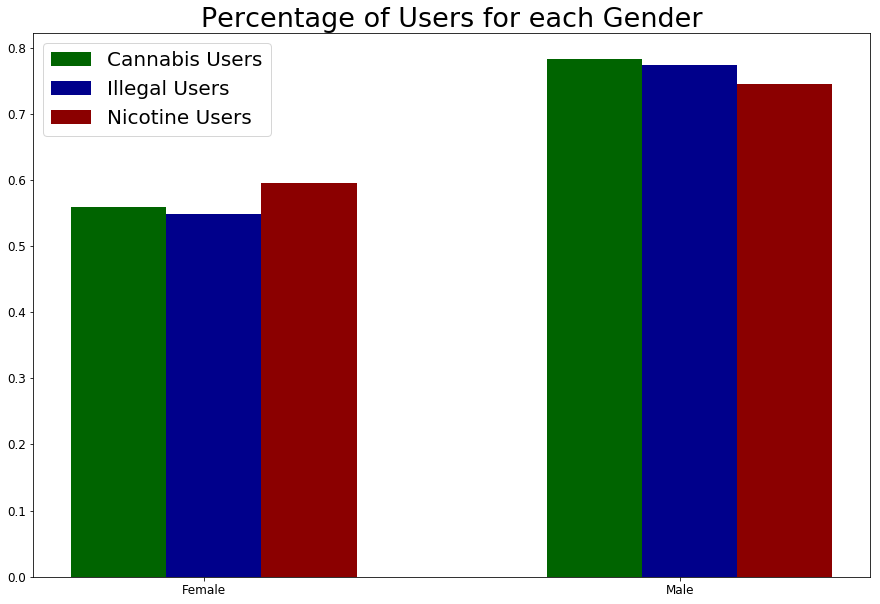

In [338]:
# Putting it on a plot!
y_pos = np.arange(len(illegal_user_gender_counts))
y_pos

plt.figure(figsize=(15,10))
plt.bar(y_pos+0, cannabis_percent_tried_df['Percent Use'], width=0.2, label='Cannabis Users' ,color='darkgreen')
plt.bar(y_pos+0.2, illegal_percent_tried_df['Percent Use'], width=0.2, label='Illegal Users', color='darkblue')
plt.bar(y_pos+0.4, nicotine_percent_tried_df['Percent Use'], width=0.2, label='Nicotine Users', color='darkred')

xtick_names = ['Female', 'Male']
plt.xticks(y_pos+0.18, xtick_names, fontsize=15)
plt.legend(fontsize=20)
plt.title('Percentage of Users for each Gender', fontsize=27)
plt.tick_params(axis='both', which='major', labelsize=12)


# Visualizing Country

In [270]:
#Pulling in value counts for users and non-users countrys
cannabis_user_country_counts = drug_data.loc[drug_data['User_Cannabis'] == 1]['Country'].value_counts()
non_cannabis_user_country_counts = drug_data.loc[drug_data['User_Cannabis'] == 0]['Country'].value_counts()

#Creating a 'percent tried' metric
cannabis_percent_tried = cannabis_user_country_counts / (non_cannabis_user_country_counts + cannabis_user_country_counts)

#Put it in a dataframe
cannabis_percent_tried_df = pd.DataFrame({'Country': list(cannabis_percent_tried.index),
                                    'Percent Use': list(cannabis_percent_tried.values)})

cannabis_percent_tried_df

,Country,Percent Use
0,Australia,0.907407
1,Canada,0.770115
2,Ireland,0.800000
3,New Zealand,NaN
4,Other,0.847458
5,UK,0.479885
6,USA,0.946140


In [271]:
#Pulling in value counts for users and non-users countrys
illegal_user_country_counts = drug_data.loc[drug_data['User_Illegal_Drugs'] == 1]['Country'].value_counts()
non_illegal_user_country_counts = drug_data.loc[drug_data['User_Illegal_Drugs'] == 0]['Country'].value_counts()

#Creating a 'percent tried' metric
illegal_percent_tried = illegal_user_country_counts / (non_illegal_user_country_counts + illegal_user_country_counts)

#Put it in a dataframe
illegal_percent_tried_df = pd.DataFrame({'Country': list(illegal_percent_tried.index),
                                    'Percent Use': list(illegal_percent_tried.values)})
illegal_percent_tried_df

,Country,Percent Use
0,Australia,0.925926
1,Canada,0.701149
2,Ireland,0.850000
3,New Zealand,NaN
4,Other,0.830508
5,UK,0.468391
6,USA,0.946140


In [272]:
#Pulling in value counts for users and non-users countrys
nicotine_user_country_counts = drug_data.loc[drug_data['User_Nicotine'] == 1]['Country'].value_counts()
non_nicotine_user_country_counts = drug_data.loc[drug_data['User_Nicotine'] == 0]['Country'].value_counts()

#Creating a 'percent tried' metric
nicotine_percent_tried = nicotine_user_country_counts / (non_nicotine_user_country_counts + nicotine_user_country_counts)

#Put it in a dataframe
nicotine_percent_tried_df = pd.DataFrame({'Country': list(nicotine_percent_tried.index),
                                    'Percent Use': list(nicotine_percent_tried.values)})
nicotine_percent_tried_df

,Country,Percent Use
0,Australia,0.777778
1,Canada,0.689655
2,Ireland,0.900000
3,New Zealand,0.600000
4,Other,0.805085
5,UK,0.557471
6,USA,0.833034


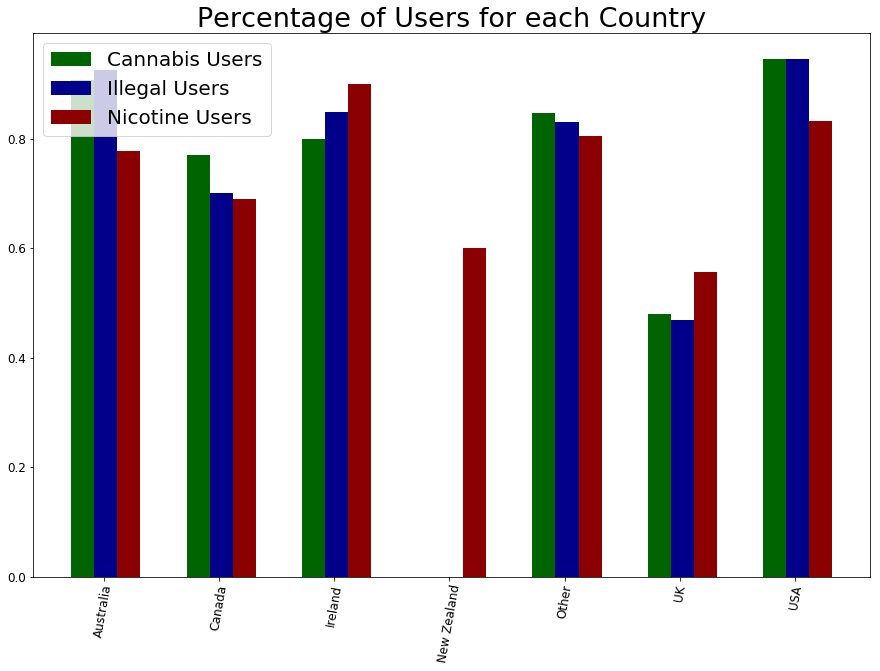

In [276]:
# Putting it on a plot!
y_pos = np.arange(len(illegal_user_country_counts))
y_pos

plt.figure(figsize=(15,10))
plt.bar(y_pos+0, cannabis_percent_tried_df['Percent Use'], width=0.2, label='Cannabis Users' ,color='darkgreen')
plt.bar(y_pos+0.2, illegal_percent_tried_df['Percent Use'], width=0.2, label='Illegal Users', color='darkblue')
plt.bar(y_pos+0.4, nicotine_percent_tried_df['Percent Use'], width=0.2, label='Nicotine Users', color='darkred')

xtick_names = list(nicotine_percent_tried_df['Country'])
plt.xticks(y_pos+0.18, xtick_names, rotation=80, fontsize=15)
plt.legend(fontsize=20)
plt.title('Percentage of Users for each Country', fontsize=27)
plt.tick_params(axis='both', which='major', labelsize=12)


In [277]:
drug_data['Country'].value_counts()

UK             1044
USA             557
Other           118
Canada           87
Australia        54
Ireland          20
New Zealand       5
Name: Country, dtype: int64

# Visualizing Personality Differences

In [286]:
#Scaling all X data here
scale = StandardScaler()



In [287]:
drug_data.iloc[:, 5:12].head()

,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575


In [288]:
# Scaling just to make sure all personality traits are scaled the same way
drug_data.iloc[:,5:12] = scale.fit_transform(drug_data.iloc[:,5:12])

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(samp1, label=lab1, color='green')
sns.distplot(samp2, label=lab2, color='red')
plt.axvline(samp1.mean(),0,1, color='green', label=lab1+" Mean", linestyle='--')
plt.axvline(samp2.mean(),0,1, color='red', label=lab2+" Mean", linestyle='--')
plt.title(lab1 + " vs. " + lab2)
plt.legend()
warnings.filterwarnings("ignore")
plt.subplot()

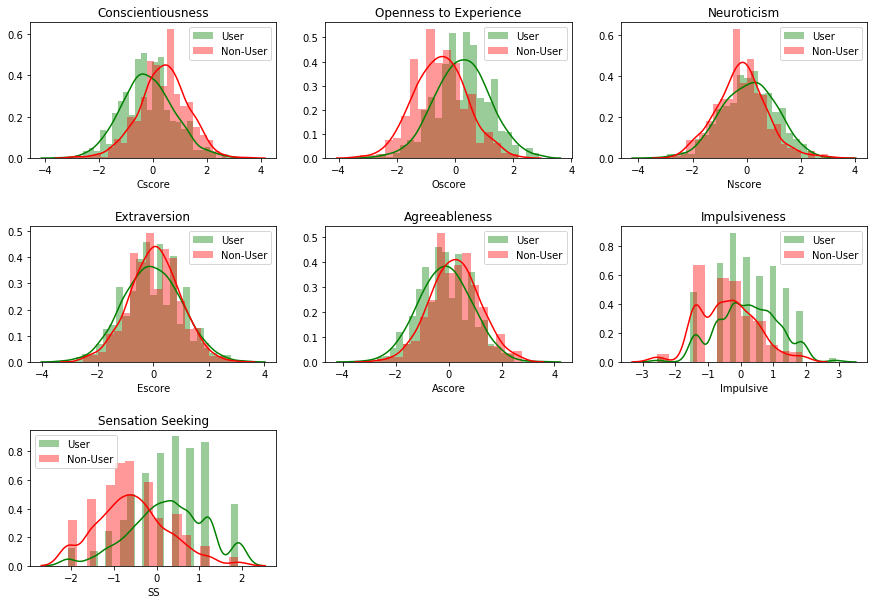

In [320]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(3,3,1)
ax1 = sns.distplot(mj_user_df['Cscore'], label="User", color='green')
ax1 = sns.distplot(non_mj_user_df['Cscore'], label="Non-User", color='red')
ax1.legend()
ax1.set_title('Conscientiousness')

ax2 = fig.add_subplot(3,3,2)
ax2 = sns.distplot(mj_user_df['Oscore'], label="User", color='green')
ax2 = sns.distplot(non_mj_user_df['Oscore'], label="Non-User", color='red')
ax2.legend()
ax2.set_title('Openness to Experience')

ax3 = fig.add_subplot(3,3,3)
ax3 = sns.distplot(mj_user_df['Nscore'], label="User", color='green')
ax3 = sns.distplot(non_mj_user_df['Nscore'], label="Non-User", color='red')
ax3.legend()
ax3.set_title('Neuroticism')

ax4 = fig.add_subplot(3,3,4)
ax4 = sns.distplot(mj_user_df['Escore'], label="User", color='green')
ax4 = sns.distplot(non_mj_user_df['Escore'], label="Non-User", color='red')
ax4.legend()
ax4.set_title('Extraversion')

ax5 = fig.add_subplot(3,3,5)
ax5 = sns.distplot(mj_user_df['Ascore'], label="User", color='green')
ax5 = sns.distplot(non_mj_user_df['Ascore'], label="Non-User", color='red')
ax5.legend()
ax5.set_title('Agreeableness')

ax6 = fig.add_subplot(3,3,6)
ax6 = sns.distplot(mj_user_df['Impulsive'], label="User", color='green')
ax6 = sns.distplot(non_mj_user_df['Impulsive'], label="Non-User", color='red')
ax6.legend()
ax6.set_title('Impulsiveness')

ax7 = fig.add_subplot(3,3,7)
ax7 = sns.distplot(mj_user_df['SS'], label="User", color='green')
ax7 = sns.distplot(non_mj_user_df['SS'], label="Non-User", color='red')
ax7.legend()
ax7.set_title('Sensation Seeking')


fig.subplots_adjust(hspace=0.5)
plt.show()

C:\Users\Alex\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


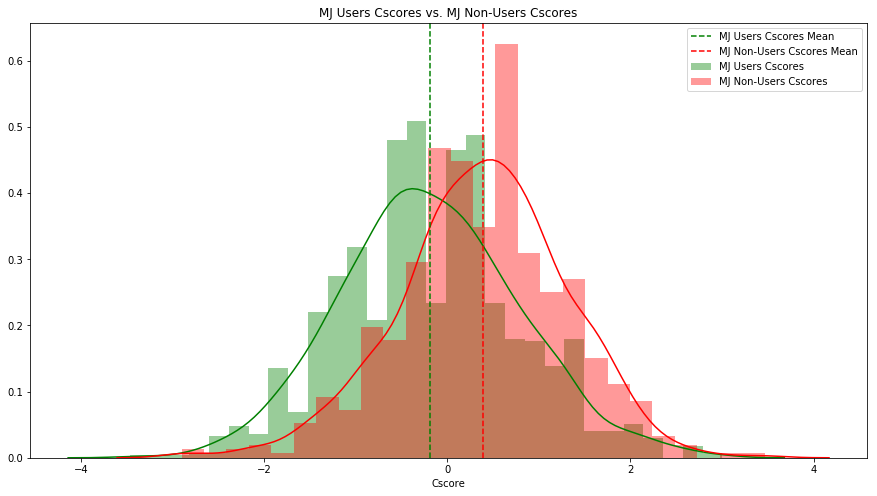

In [39]:
dist_visualization(mj_user_df['Cscore'], non_mj_user_df['Cscore'], "MJ Users Cscores", "MJ Non-Users Cscores")

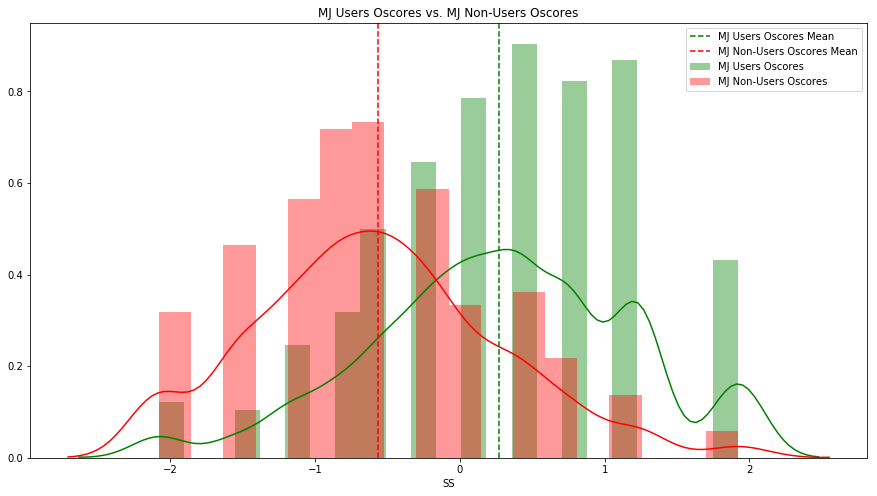

In [40]:
dist_visualization(mj_user_df['SS'], non_mj_user_df['SS'], "MJ Users Oscores", "MJ Non-Users Oscores")